Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In the cell below, flight data is retrieved from the OpenSky Network API using the `requests` library. The JSON response is parsed, and each flight's state vector is converted into a dictionary with named fields (such as `icao24`, `callsign`, `origin_country`, etc.). These dictionaries are collected into a list called `flights`. Finally, a pandas DataFrame named `df` is created from the raw API data and its first few rows are printed for inspection.

In [76]:
url = "https://opensky-network.org/api/states/all"
response = requests.get(url)

data = response.json()

# Convert to list of dictionaries for convenience
flights = []
for state in data.get("states", []):
    state = state + [None]*(18 - len(state))

    flights.append({
        "icao24": state[0],
        "callsign": state[1],
        "origin_country": state[2],
        "time_position": state[3],
        "last_contact": state[4],
        "longitude": state[5],
        "latitude": state[6],
        "baro_altitude": state[7],
        "on_ground": state[8],
        "velocity": state[9],
        "true_track": state[10],
        "vertical_rate": state[11],
        "sensors": state[12],
        "geo_altitude": state[13],
        "squawk": state[14],
        "spi": state[15],
        "position_source": state[16],
        "category": state[17]
    })

# Create DataFrame
df = pd.DataFrame(data)

print(df.head())

         time                                             states
0  1756500263  [e8027c, LPE2390 , Chile, 1756500183, 17565001...
1  1756500263  [a58211, N454MF  , United States, 1756500262, ...
2  1756500263  [e8027b, , Chile, 1756500080, 1756500082, -54....
3  1756500263  [39de4b, TVF8152 , France, 1756500262, 1756500...
4  1756500263  [39de4a, TVF67BM , France, 1756500262, 1756500...


### Initiating EDA(Exploratory Data Analysis)

In [77]:
df.head()

,time,states
0,1756500263,"[e8027c, LPE2390 , Chile, 1756500183, 17565001..."
1,1756500263,"[a58211, N454MF , United States, 1756500262, ..."
2,1756500263,"[e8027b, , Chile, 1756500080, 1756500082, -54...."
3,1756500263,"[39de4b, TVF8152 , France, 1756500262, 1756500..."
4,1756500263,"[39de4a, TVF67BM , France, 1756500262, 1756500..."


In [78]:

def pad_state(state):
    if state is None:
        return [None]*18
    return state + [None]*(18 - len(state))


states_padded = df['states'].apply(pad_state)

# Cria DataFrame expandido
df_expanded = pd.DataFrame(states_padded.tolist(), columns=[
    "icao24",
    "callsign",
    "origin_country",
    "time_position",
    "last_contact",
    "longitude",
    "latitude",
    "baro_altitude",
    "on_ground",
    "velocity",
    "true_track",
    "vertical_rate",
    "sensors",
    "geo_altitude",
    "squawk",
    "spi",
    "position_source",
    "category"
])

# Mantém a coluna 'time'
df_final = pd.concat([df['time'], df_expanded], axis=1)

df_final.head()

,time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category
0,1756500263,e8027c,LPE2390,Chile,1.756500e+09,1756500183,-74.8304,6.0060,10972.80,False,237.16,5.35,0.00,None,11673.84,None,False,0,None
1,1756500263,a58211,N454MF,United States,1.756500e+09,1756500262,-77.9240,34.2445,13106.40,False,235.66,7.65,0.00,None,13578.84,None,False,0,None
2,1756500263,e8027b,,Chile,1.756500e+09,1756500082,-54.5170,-10.4510,12192.00,False,237.72,228.86,-0.33,None,12900.66,None,False,0,None
3,1756500263,39de4b,TVF8152,France,1.756500e+09,1756500262,2.7907,46.2494,11887.20,False,263.39,162.03,0.00,None,12153.90,7666,False,0,None
4,1756500263,39de4a,TVF67BM,France,1.756500e+09,1756500262,2.7676,42.1873,6644.64,False,213.32,190.28,-7.15,None,6911.34,1000,False,0,None


In [79]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11162 non-null  int64  
 1   icao24           11162 non-null  object 
 2   callsign         11162 non-null  object 
 3   origin_country   11162 non-null  object 
 4   time_position    11051 non-null  float64
 5   last_contact     11162 non-null  int64  
 6   longitude        11051 non-null  float64
 7   latitude         11051 non-null  float64
 8   baro_altitude    10264 non-null  float64
 9   on_ground        11162 non-null  bool   
 10  velocity         11161 non-null  float64
 11  true_track       11162 non-null  float64
 12  vertical_rate    10307 non-null  float64
 13  sensors          0 non-null      object 
 14  geo_altitude     10187 non-null  float64
 15  squawk           5473 non-null   object 
 16  spi              11162 non-null  bool   
 17  position_sou

In [80]:
#df_final.drop(['category', 'sensors'], axis=1, inplace=True) # considering droping squawk too
df_final['time'] = pd.to_datetime(df_final['time'], unit='s')
df_final['time_position'] = pd.to_datetime(df_final['time_position'], unit='s')
df_final['last_contact'] = pd.to_datetime(df_final['last_contact'], unit='s')
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             11162 non-null  datetime64[ns]
 1   icao24           11162 non-null  object        
 2   callsign         11162 non-null  object        
 3   origin_country   11162 non-null  object        
 4   time_position    11051 non-null  datetime64[ns]
 5   last_contact     11162 non-null  datetime64[ns]
 6   longitude        11051 non-null  float64       
 7   latitude         11051 non-null  float64       
 8   baro_altitude    10264 non-null  float64       
 9   on_ground        11162 non-null  bool          
 10  velocity         11161 non-null  float64       
 11  true_track       11162 non-null  float64       
 12  vertical_rate    10307 non-null  float64       
 13  sensors          0 non-null      object        
 14  geo_altitude     10187 non-null  float

In [81]:
df_final.head()

,time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,true_track,vertical_rate,sensors,geo_altitude,squawk,spi,position_source,category
0,2025-08-29 20:44:23,e8027c,LPE2390,Chile,2025-08-29 20:43:03,2025-08-29 20:43:03,-74.8304,6.0060,10972.80,False,237.16,5.35,0.00,None,11673.84,None,False,0,None
1,2025-08-29 20:44:23,a58211,N454MF,United States,2025-08-29 20:44:22,2025-08-29 20:44:22,-77.9240,34.2445,13106.40,False,235.66,7.65,0.00,None,13578.84,None,False,0,None
2,2025-08-29 20:44:23,e8027b,,Chile,2025-08-29 20:41:20,2025-08-29 20:41:22,-54.5170,-10.4510,12192.00,False,237.72,228.86,-0.33,None,12900.66,None,False,0,None
3,2025-08-29 20:44:23,39de4b,TVF8152,France,2025-08-29 20:44:22,2025-08-29 20:44:22,2.7907,46.2494,11887.20,False,263.39,162.03,0.00,None,12153.90,7666,False,0,None
4,2025-08-29 20:44:23,39de4a,TVF67BM,France,2025-08-29 20:44:22,2025-08-29 20:44:22,2.7676,42.1873,6644.64,False,213.32,190.28,-7.15,None,6911.34,1000,False,0,None


### Starting EDA

Calculating Null values percentage by collumn

In [96]:
null_values_perc = pd.DataFrame(df_final.isnull().mean()*100, columns=['% of null values']).sort_values(by='% of null values', ascending=False)
null_values_perc = null_values_perc.reset_index().rename(columns={'index': 'Column'})
null_values_perc = null_values_perc[null_values_perc['% of null values'] > 0]
null_values_perc

,Column,% of null values
0,category,100.000000
1,sensors,100.000000
2,squawk,50.967569
3,geo_altitude,8.734994
4,baro_altitude,8.045153
5,vertical_rate,7.659918
6,latitude,0.994445
7,longitude,0.994445
8,time_position,0.994445
9,velocity,0.008959


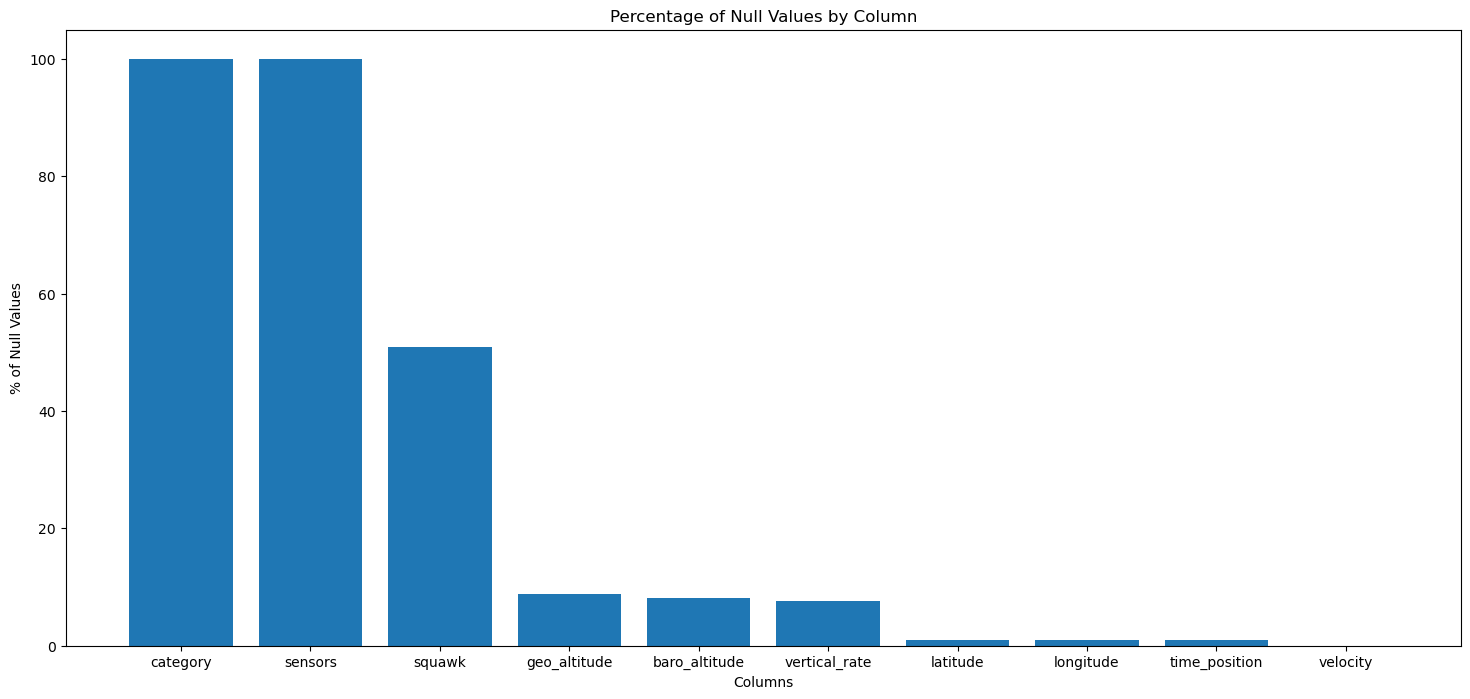

In [98]:
plt.figure(figsize=(18, 8))
plt.bar(null_values_perc['Column'], null_values_perc['% of null values'])
plt.xlabel('Columns')
plt.ylabel('% of Null Values')
plt.title('Percentage of Null Values by Column')
plt.show()

#df_final.columns[df_final.isna().any()].tolist()[::-1],

### Looking for abnormalities or outliers

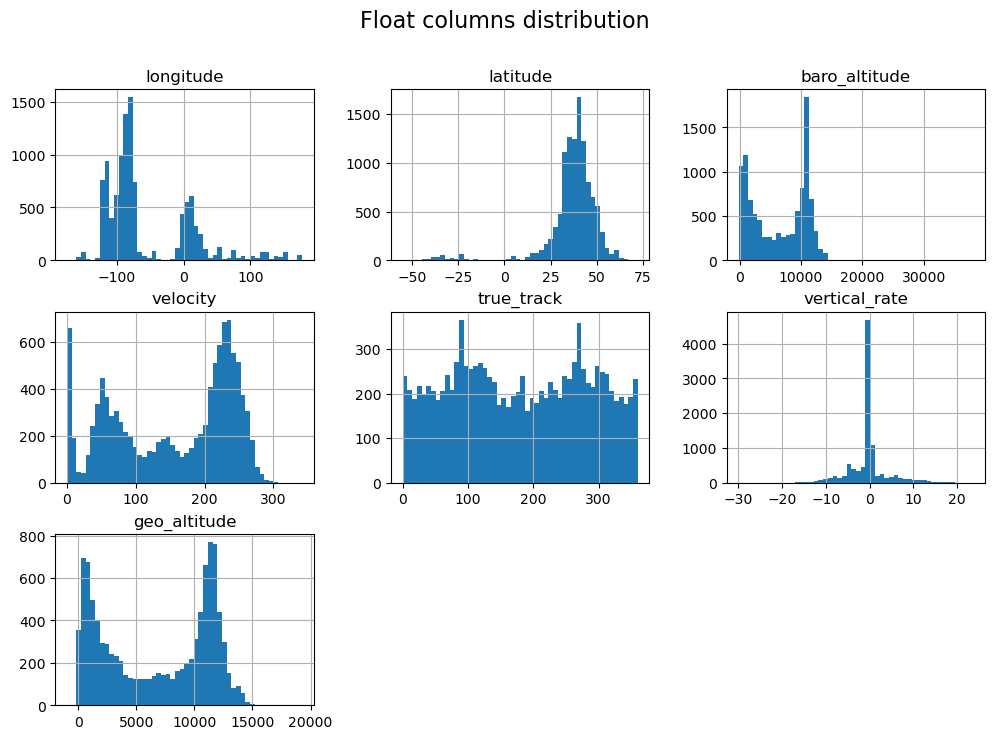

In [99]:
df_float = df_final.select_dtypes(include=['float64', 'float32'])
df_float.hist(figsize=(12,8), bins=50)
plt.suptitle("Float columns distribution", fontsize=16)
plt.show()


In [100]:
min_max = df_float.agg(['min', 'max']).T
min_max


,min,max
longitude,-174.6812,176.9235
latitude,-54.9730,72.0216
baro_altitude,-144.7800,38069.5200
velocity,0.0000,341.4700
true_track,0.0000,359.8700
vertical_rate,-29.9100,23.7300
geo_altitude,-960.1200,19248.1200


#### Timestamp Consistency